In [1]:
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

%matplotlib inline

In [8]:
ship = pd.read_csv('../data/fuel_consumption_by_ship_size_prepped.csv')
#source: The Geography of Transport Systems- https://transportgeography.org/contents/chapter4/transportation-and-energy/fuel-consumption-containerships/
#converted to data with:  http://getdata-graph-digitizer.com/

truck = pd.read_csv('../data/truck_ton_mpg_prepped.csv')
#source: US Energey Information Administration - https://www.eia.gov/totalenergy/data/browser/?tbl=T01.08

#uk_trucks = pd.read_csv('../data/mpg_trucks2.csv')  decided not to use
#source: Data.gov.uk: Leeds City Council - https://ckan.publishing.service.gov.uk/dataset/fleet-vehicles-fuel-consumption/resource/f6531c40-c5f0-42e4-af40-a19998d6ab93

In [12]:
#setting the size of my visuals:
sns.set(rc={"figure.figsize":(13, 8)},font_scale=1.5, style='darkgrid')

In [9]:
ship.head()

,Ship Size (TEU),TEU avg,TEU to weight lbs,TEU to weight - tons,Speed- Knots,Fuel Consumption - Tons per Day,Speed-MPH,Ton miles per hour,Fuel Consumption - Gallons per day,Fuel Consumption- Gallons/hour,MPG,Gallons per mile,Ton MPG,Ton MPG cleaner
0,"10,000+",10000.0,529100000.0,264550.0,17.48,103.56,20.102576,13160.00495,77468.63057,3227.859607,0.006228,160.569452,4.077007,4.08
1,"10,000+",10000.0,529100000.0,264550.0,17.55,105.62,20.185889,13105.68954,79011.10832,3292.129514,0.006132,163.090634,3.980916,3.98
2,"10,000+",10000.0,529100000.0,264550.0,17.66,108.71,20.304878,13028.88871,81322.85500,3388.452292,0.005992,166.878729,3.845085,3.85
3,"10,000+",10000.0,529100000.0,264550.0,17.74,109.77,20.400366,12967.90446,82111.82351,3421.325979,0.005963,167.709047,3.790315,3.79
4,"10,000+",10000.0,529100000.0,264550.0,17.79,110.81,20.459967,12930.12860,82888.97226,3453.707177,0.005924,168.803168,3.743840,3.74


In [10]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Ship Size (TEU)                     429 non-null    object 
 1   TEU avg                             429 non-null    float64
 2   TEU to weight lbs                   429 non-null    float64
 3   TEU to weight - tons                429 non-null    float64
 4   Speed- Knots                        429 non-null    float64
 5   Fuel Consumption - Tons per Day     429 non-null    float64
 6   Speed-MPH                           429 non-null    float64
 7   Ton miles per hour                  429 non-null    float64
 8   Fuel Consumption - Gallons per day  429 non-null    float64
 9   Fuel Consumption- Gallons/hour      429 non-null    float64
 10  MPG                                 429 non-null    float64
 11  Gallons per mile                    429 non-n

In [11]:
ship_graph = ship[['Ship Size (TEU)', 'Speed-MPH', 'Ton MPG cleaner']]

Text(0.5, 1.0, 'Ton-MPG by Ship Size and Speed')

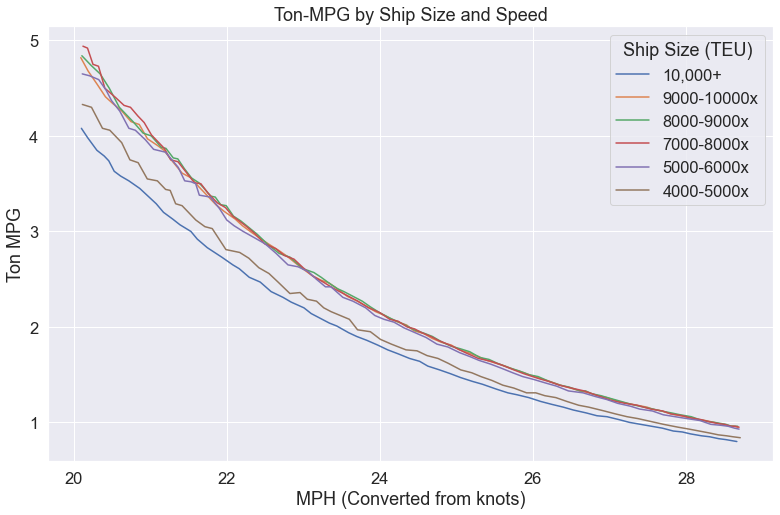

In [15]:
a = sns.lineplot(data = ship_graph, x = 'Speed-MPH', y = 'Ton MPG cleaner', hue = 'Ship Size (TEU)')
a.set(xlabel = 'MPH (Converted from knots)', ylabel = 'Ton MPG')
a.set_title('Ton-MPG by Ship Size and Speed')

In [17]:
truck.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Avg weight hauled - lbs,Source/Notes:,Avg weight/tons
0,TRFRRUS,194913,9,9,Heavy-Duty Trucks Fuel Economy,Miles per Gallon,44000,https://www.freightwaves.com/news/how-much-wei...,22
1,TRFRRUS,195013,8.4,9,Heavy-Duty Trucks Fuel Economy,Miles per Gallon,44000,NaN,22
2,TRFRRUS,195113,8.5,9,Heavy-Duty Trucks Fuel Economy,Miles per Gallon,44000,NaN,22
3,TRFRRUS,195213,8.4,9,Heavy-Duty Trucks Fuel Economy,Miles per Gallon,44000,NaN,22
4,TRFRRUS,195313,8.5,9,Heavy-Duty Trucks Fuel Economy,Miles per Gallon,44000,NaN,22


In [20]:
truck_visual = truck[['Avg weight/tons','Value']]

In [27]:
truck_visual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Avg weight/tons  213 non-null    int64 
 1   Value            213 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [28]:
truck_visual.iloc[71]

Avg weight/tons               10
Value              Not Available
Name: 71, dtype: object

In [31]:
truck_visual = truck_visual[truck_visual['Value'] != 'Not Available']

In [35]:
truck_visual['Value'] = pd.to_numeric(truck_visual['Value'])

In [36]:
truck_visual.groupby('Avg weight/tons').mean()

,Value
Avg weight/tons,
5,18.152113
10,14.905556
22,6.491549


In [39]:
truck_visual2 = truck_visual[truck_visual.groupby('Avg weight/tons').mean().rename_axis('avg_tons_carried').reset_index(name='avg_mpg')

ValueError: Boolean array expected for the condition, not object